# WHAT'S COOKIN

##### 1. About the dataset:
The dataset included ingredients from cuisines all over the region. No information on the dishes name and recipe. Only where it comes from and the ingredients.
##### 2. The purpose:
The original purpose of competition in Kaggle using this dataset is to create model for determining where the dishes come from just based on the ingredients.
##### 3. In this notebook:
At the end there will be model to determine dishes just based on the ingredients. However along the way, it will also ravel how geographical placement and history affect food ingredients across the region

### Module

In [44]:
!pip install wordcloud

In [45]:
import json #--> to open the data since it is in json form
import pandas as pd #--> EDA
## below are for doing NLP on the ingredients and creating the model
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import SGDClassifier
from nltk.stem import WordNetLemmatizer
import nltk
import re
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import csv
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

### Exploratory Data Analysis

In [2]:
with open('train.json', 'r') as train_file:
    train_data = json.load(train_file)
print(len(train_data))

39774


In [3]:
print(type(train_data))

<class 'list'>


In [4]:
print(train_data[0])

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


In [5]:
# print(train_data[0]['id'])

In [6]:
# print(train_data[0]['cuisine'])

In [7]:
# print(train_data[0]['ingredients'])

In [8]:
# for x in range(len(train_data)):
#     print(train_data[x]['id'])

In [9]:
df = pd.DataFrame(train_data, columns =['id', 'cuisine', 'ingredients'], dtype = object) 
df 

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [10]:
df['ingredients_string'] = [','.join(map(str, l)) for l in df['ingredients']]

#### List of cuisine origin region and data amount for each

<AxesSubplot:>

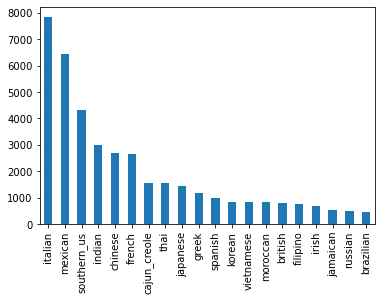

In [11]:
df.cuisine.value_counts()
df.cuisine.value_counts().plot.bar()

In [12]:
brazilian = df[df.cuisine == 'brazilian']
british = df[df.cuisine == 'british']
cajun_creole = df[df.cuisine == 'cajun_creole']
chinese = df[df.cuisine == 'chinese']
filipino = df[df.cuisine == 'filipino']
french = df[df.cuisine == 'french']
greek = df[df.cuisine == 'greek']
indian = df[df.cuisine == 'indian']
irish = df[df.cuisine == 'irish']
italian = df[df.cuisine == 'italian']
jamaican = df[df.cuisine == 'jamaican']
japanese = df[df.cuisine == 'japanese']
korean = df[df.cuisine == 'korean']
mexican = df[df.cuisine == 'mexican']
moroccan = df[df.cuisine == 'moroccan']
russian = df[df.cuisine == 'russian']
southern_us = df[df.cuisine == 'southern_us']
spanish = df[df.cuisine == 'spanish']
thai = df[df.cuisine == 'thai']
vietnamese = df[df.cuisine == 'vietnamese']

#### Frequently used ingredients in all cuisine

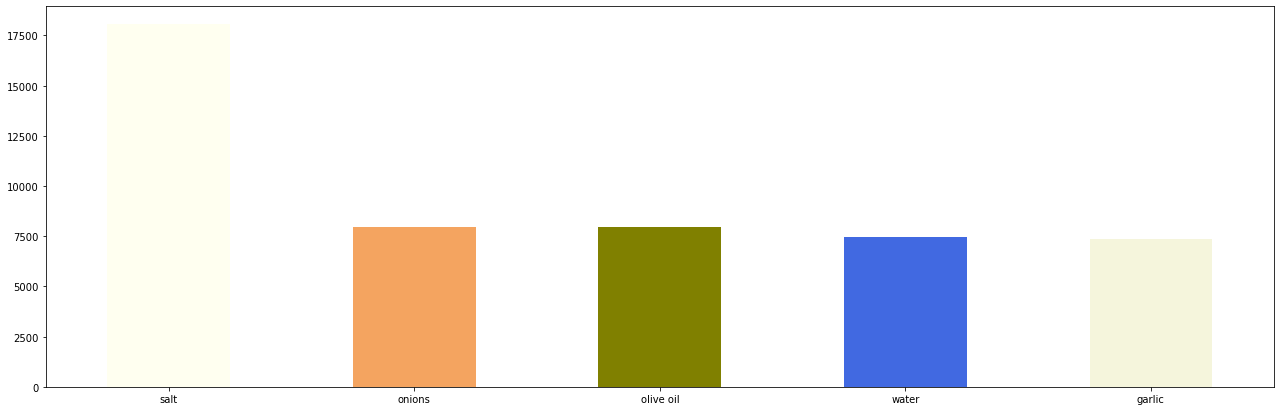

In [39]:
fig, ax = plt.subplots(figsize=(22,7))
ing_list = []
for x in df['ingredients']:
    for y in x:
        ing_list.append(y)
        
ing_list = pd.Series(ing_list)
ing_list.value_counts().sort_values(ascending=False).head(5).plot.bar(ax=ax, color =['#FFFFF0','#F4A460','#808000','#4169E1','#F5F5DC'])
ax.tick_params(axis='x',rotation=360)

<Figure size 432x288 with 0 Axes>

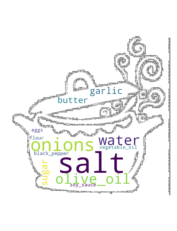

<Figure size 432x288 with 0 Axes>

In [84]:
top_15_ingredients = ing_list.value_counts().sort_values(ascending=False).head(15)
wordtext = ('salt onions olive_oil water garlic sugar butter black_pepper flour vegetable_oil soy_sauce eggs')


food_mask = np.array(Image.open("food-stencil-37.jpg"))
wc = WordCloud(background_color="white", max_words=15, mask=food_mask,
               contour_width=3, contour_color='gray')
wc.generate(wordtext)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
# plt.imshow(food_mask, cmap=plt.cm.gray, interpolation='bilinear')

#### Frequently used ingredients in each region cuisine:
The ingredients listed already exclude frequently used ingredients across all region cuisine such as salt, onions, water, garlic and sugar. Olive oil is considered to be included since it is more commonly used in european especially italian dishes. Since the data on italian food is bigger in amount compare than others, the result above might be influnce by that fact.

In [14]:
frequent = ['salt','water','sugar','extra-virgin olive oil','unsalted butter','salted butter','garlic','onions', 'garlic cloves']
ing_list = {}

brazil_ing_list = []
for x in brazilian['ingredients']:
    for y in x:
        if y not in frequent:
            brazil_ing_list.append(y)
        
brazil_ing_list = pd.Series(brazil_ing_list)
brazil_ing_list = brazil_ing_list.value_counts().sort_values(ascending=False).head(5)
brazil = {'brazil' : brazil_ing_list.index.tolist()}
ing_list.update(brazil)
brazil_ing_list

olive oil       118
lime             89
cachaca          70
tomatoes         63
coconut milk     58
dtype: int64

In [15]:
british_ing_list = []
for x in british['ingredients']:
    for y in x:
        if y not in frequent:
            british_ing_list.append(y)
        
british_ing_list = pd.Series(british_ing_list)
british_ing_list = british_ing_list.value_counts().sort_values(ascending=False).head(5)
british = {'british' : british_ing_list.index.tolist()}
british_ing_list

all-purpose flour    238
butter               222
milk                 202
eggs                 191
baking powder        122
dtype: int64

In [16]:
ing_list.update(british)

In [17]:
cajun_ing_list = []
for x in cajun_creole['ingredients']:
    for y in x:
        if y not in frequent:
            cajun_ing_list.append(y)
        
cajun_ing_list = pd.Series(cajun_ing_list)
cajun_ing_list = cajun_ing_list.value_counts().sort_values(ascending=False).head(5)
cajun = {'cajun' : cajun_ing_list.index.tolist()}
ing_list.update(cajun)
cajun_ing_list

green bell pepper    336
butter               334
olive oil            316
cayenne pepper       297
cajun seasoning      293
dtype: int64

In [18]:
chinese_ing_list = []
for x in chinese['ingredients']:
    for y in x:
        if y not in frequent:
            chinese_ing_list.append(y)
        
chinese_ing_list = pd.Series(chinese_ing_list)
chinese_ing_list = chinese_ing_list.value_counts().sort_values(ascending=False).head(5)
chinese = {'chinese' : chinese_ing_list.index.tolist()}
ing_list.update(chinese)
chinese_ing_list

soy sauce        1363
sesame oil        915
corn starch       906
green onions      628
vegetable oil     602
dtype: int64

In [19]:
filipino_ing_list = []
for x in filipino['ingredients']:
    for y in x:
        if y not in frequent:
            filipino_ing_list.append(y)
        
filipino_ing_list = pd.Series(filipino_ing_list)
filipino_ing_list = filipino_ing_list.value_counts().sort_values(ascending=False).head(5)
filipino = {'filipino' : filipino_ing_list.index.tolist()}
ing_list.update(filipino)
filipino_ing_list

soy sauce              251
pepper                 199
oil                    166
carrots                128
ground black pepper    124
dtype: int64

In [20]:
french_ing_list = []
for x in french['ingredients']:
    for y in x:
        if y not in frequent:
            french_ing_list.append(y)
        
french_ing_list = pd.Series(french_ing_list)
french_ing_list = french_ing_list.value_counts().sort_values(ascending=False).head(5)
french = {'french' : french_ing_list.index.tolist()}
ing_list.update(french)
french_ing_list

all-purpose flour      593
olive oil              516
butter                 514
large eggs             415
ground black pepper    385
dtype: int64

In [21]:
greek_ing_list = []
for x in greek['ingredients']:
    for y in x:
        if y not in frequent:
            greek_ing_list.append(y)
        
greek_ing_list = pd.Series(greek_ing_list)
greek_ing_list = greek_ing_list.value_counts().sort_values(ascending=False).head(5)
greek = {'greek' : greek_ing_list.index.tolist()}
ing_list.update(greek)
greek_ing_list

olive oil               504
dried oregano           267
feta cheese crumbles    252
fresh lemon juice       222
ground black pepper     221
dtype: int64

In [22]:
irish_ing_list = []
for x in irish['ingredients']:
    for y in x:
        if y not in frequent:
            irish_ing_list.append(y)
        
irish_ing_list = pd.Series(irish_ing_list)
irish_ing_list = irish_ing_list.value_counts().sort_values(ascending=False).head(5)
irish = {'irish' : irish_ing_list.index.tolist()}
ing_list.update(irish)
irish_ing_list

butter               219
all-purpose flour    219
potatoes             120
baking soda          115
baking powder        112
dtype: int64

In [23]:
italian_ing_list = []
for x in italian['ingredients']:
    for y in x:
        if y not in frequent:
            italian_ing_list.append(y)
        
italian_ing_list = pd.Series(italian_ing_list)
italian_ing_list = italian_ing_list.value_counts().sort_values(ascending=False).head(5)
italian = {'italian' : italian_ing_list.index.tolist()}
ing_list.update(italian)
italian_ing_list

olive oil                 3111
grated parmesan cheese    1580
ground black pepper       1444
butter                    1030
pepper                     965
dtype: int64

In [24]:
jamaican_ing_list = []
for x in jamaican['ingredients']:
    for y in x:
        if y not in frequent:
            jamaican_ing_list.append(y)
        
jamaican_ing_list = pd.Series(jamaican_ing_list)
jamaican_ing_list = jamaican_ing_list.value_counts().sort_values(ascending=False).head(5)
jamaican = {'jamaican' : jamaican_ing_list.index.tolist()}
ing_list.update(jamaican)
jamaican_ing_list

ground allspice    128
pepper             125
scallions          111
dried thyme        105
black pepper       103
dtype: int64

In [25]:
japanese_ing_list = []
for x in japanese['ingredients']:
    for y in x:
        if y not in frequent:
            japanese_ing_list.append(y)
        
japanese_ing_list = pd.Series(japanese_ing_list)
japanese_ing_list = japanese_ing_list.value_counts().sort_values(ascending=False).head(5)
japanese = {'japanese' : japanese_ing_list.index.tolist()}
ing_list.update(japanese)
japanese_ing_list

soy sauce        561
mirin            402
sake             289
rice vinegar     261
vegetable oil    245
dtype: int64

In [26]:
korean_ing_list = []
for x in korean['ingredients']:
    for y in x:
        if y not in frequent:
            korean_ing_list.append(y)
        
korean_ing_list = pd.Series(korean_ing_list)
korean_ing_list = korean_ing_list.value_counts().sort_values(ascending=False).head(5)
korean = {'korean' : korean_ing_list.index.tolist()}
ing_list.update(korean)
korean_ing_list

soy sauce       427
sesame oil      403
green onions    293
sesame seeds    223
scallions       196
dtype: int64

In [27]:
mexican_ing_list = []
for x in mexican['ingredients']:
    for y in x:
        if y not in frequent:
            mexican_ing_list.append(y)
        
mexican_ing_list = pd.Series(mexican_ing_list)
mexican_ing_list = mexican_ing_list.value_counts().sort_values(ascending=False).head(5)
mexican = {'mexican' : mexican_ing_list.index.tolist()}
ing_list.update(mexican)
mexican_ing_list

ground cumin        1346
olive oil           1289
chili powder        1236
jalapeno chilies    1146
sour cream          1076
dtype: int64

In [28]:
moroccan_ing_list = []
for x in moroccan['ingredients']:
    for y in x:
        if y not in frequent:
            moroccan_ing_list.append(y)
        
moroccan_ing_list = pd.Series(moroccan_ing_list)
moroccan_ing_list = moroccan_ing_list.value_counts().sort_values(ascending=False).head(5)
moroccan = {'moroccan' : moroccan_ing_list.index.tolist()}
ing_list.update(moroccan)
moroccan_ing_list

olive oil          412
ground cumin       348
ground cinnamon    223
ground ginger      175
carrots            155
dtype: int64

In [29]:
russian_ing_list = []
for x in russian['ingredients']:
    for y in x:
        if y not in frequent:
            russian_ing_list.append(y)
        
russian_ing_list = pd.Series(russian_ing_list)
russian_ing_list = russian_ing_list.value_counts().sort_values(ascending=False).head(5)
russian = {'russian' : russian_ing_list.index.tolist()}
ing_list.update(russian)
russian_ing_list

all-purpose flour    123
sour cream           117
eggs                 112
butter               104
large eggs            85
dtype: int64

In [30]:
southern_us_ing_list = []
for x in southern_us['ingredients']:
    for y in x:
        if y not in frequent:
            southern_us_ing_list.append(y)
        
southern_us_ing_list = pd.Series(southern_us_ing_list)
southern_us_ing_list = southern_us_ing_list.value_counts().sort_values(ascending=False).head(5)
southern_us = {'southern_us' : southern_us_ing_list.index.tolist()}
ing_list.update(southern_us)
southern_us_ing_list

butter               1255
all-purpose flour    1222
large eggs            746
baking powder         729
milk                  645
dtype: int64

In [31]:
spanish_ing_list = []
for x in spanish['ingredients']:
    for y in x:
        if y not in frequent:
            spanish_ing_list.append(y)
        
spanish_ing_list = pd.Series(spanish_ing_list)
spanish_ing_list = spanish_ing_list.value_counts().sort_values(ascending=False).head(5)
spanish = {'spanish' : spanish_ing_list.index.tolist()}
ing_list.update(spanish)
spanish_ing_list


olive oil              387
tomatoes               151
ground black pepper    149
red bell pepper        142
pepper                 133
dtype: int64

In [32]:
thai_ing_list = []
for x in thai['ingredients']:
    for y in x:
        if y not in frequent:
            thai_ing_list.append(y)
        
thai_ing_list = pd.Series(thai_ing_list)
thai_ing_list = thai_ing_list.value_counts().sort_values(ascending=False).head(5)
thai = {'thai' : thai_ing_list.index.tolist()}
ing_list.update(thai)
thai_ing_list


fish sauce          625
coconut milk        353
vegetable oil       335
soy sauce           332
fresh lime juice    273
dtype: int64

In [33]:
vietnamese_ing_list = []
for x in vietnamese['ingredients']:
    for y in x:
        if y not in frequent:
            vietnamese_ing_list.append(y)
        
vietnamese_ing_list = pd.Series(vietnamese_ing_list)
vietnamese_ing_list = vietnamese_ing_list.value_counts().sort_values(ascending=False).head(5)
vietnamese = {'vietnamese' : vietnamese_ing_list.index.tolist()}
ing_list.update(vietnamese)
vietnamese_ing_list

fish sauce       392
carrots          196
soy sauce        155
shallots         151
vegetable oil    145
dtype: int64

### Edited dataset
The edited dataset is for a more balance amount of cuisine from each region and in order to decrease burden on machine.

In [34]:
df_edit= pd.read_csv("cuisine_data_edited.csv")

<AxesSubplot:>

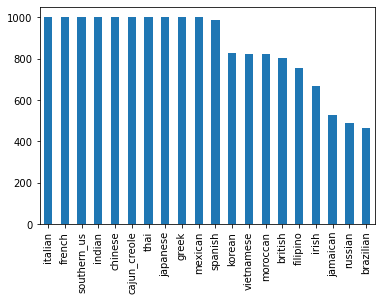

In [35]:
df_edit.cuisine.value_counts().plot.bar()

In [36]:
len(df_edit)

17185

### Preprocessing data for NLP analysis:
For this problem, NLP is used. Basically the approach for this case will be determining how often several ingredients used in a cuisine from certain region. The ingredients information itself is in form of words. Hence, NLP is suitable to calculate ingredients matrix. 
The pre-processing include: 
1. Deleting certain words (crushed, crumble, ground). The ingredients in dataset also included processing description such as crushed, crumbles, ground etc which will affect the categorizing. Same ingredients such as garlic and crushed garlic will be categorized differently.
2. Lowering the character

The more usual technique for NLP such as lemmatization is not included since most of the word in ingredients is in their original form. 

In [85]:
ingredients_list = []
for i in range(len(df_edit)-1):
    ings = re.sub(r'\(.*oz.\)|crushed|crumbles|ground|minced|chopped|sliced|dried|all-purpose|extra|salted|unsalted',' ', df_edit['ingredients_string'][i])
    ings = re.sub(' ','',ings)
    ings = ings.lower()
    df_edit['ingredients_string'][i] = ings

C:\Users\Adinda Gita\AppData\Local\Temp\ipykernel_8896\1270986573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edit['ingredients_string'][i] = ings


In [ ]:
df_edit

#### TF-IDF
Term Frequency - Inverse Document Frequency = Is a technique to quantify words in set of document. 
The formula:
TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)
tf-idf(t,d) = tf(t,d) * log(N/(df+1))
t - term (word)
d - document (set of words)
N - count of corpus
corpus - total set of documents

In this context, the amount of ingredients will be the term(word) counted while recipes count of documents.This way we will measure how importants an ingredients(word) in dished from a region(document)

In [ ]:
tfid = TfidfVectorizer()

In [146]:
X = tfid.fit_transform(df_edit["ingredients_string"].tolist())
y = df_edit.cuisine.astype("category").cat.codes

#### PCA
Principal Component Analysis is a dimensionality reduction method that usually used when data correlated with each other. In this case, we would like to see the mapping of cuisine to each other from different geographic area. For this, I've only selected a representation for each area. Southern_us represent north america, italian represent Europe, Chinese represent East Asian, Moroccan represent Africa and Brazilian represent south america.

In [156]:
cuisine_name_list = df_edit.cuisine.astype("category").cat.categories
cuisine_subset = ['southern_us','italian','chinese','moroccan','brazilian']
# 'indian','chinese','thai','japanese','korean','vietnamese','moroccan','filipino'
# 'southern_us','spanish','chinese','moroccan','jamaican'
# italian,mexican,southern_us,indian,chinese,french,cajun_creole,thai,japanese,greek,spanish,korean,vietnamese,moroccan,british,filipino,irish,jamaican,russian,brazilian
subset = df_edit.cuisine.apply(lambda x: x in cuisine_subset)
X_subset, y_subset = X[subset], y[subset]

In [157]:
kpca = KernelPCA(n_components=2, kernel='cosine')
x_pca = kpca.fit_transform(X_subset)
x_pca.shape

(4292, 2)

C:\Users\Adinda Gita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


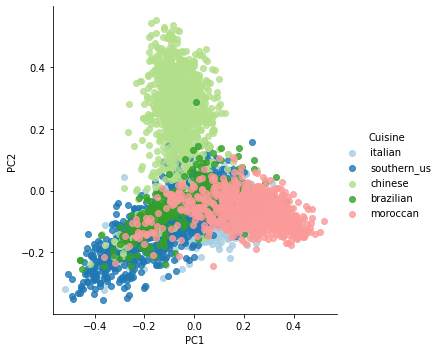

In [158]:
plot_pca = pd.DataFrame(data = x_pca[:,:2], columns = ["PC1","PC2"])
plot_pca["Cuisine"] = cuisine_name_list[y_subset].tolist()
sns.lmplot("PC1", "PC2", data = plot_pca, palette = "Paired",legend=True, hue = "Cuisine", fit_reg = False)

From graph above, a rough image of how a cuisine diverge or closer from each other in terms of ingredient could be seen. It is quite unique that moroccah, southern US and Brazillian cuisine shared a lot of ingredients with Italian cuisine at some points. If using only informations on above section on what ingredients are commonly used, italian, brazilian and moroccan dishes uses olive oil frequently.  While a commonly shared ingredients between Southern US and Italian food is butter. It would be interesting to see how cultural exchange happen between this country and how it affects each of their cuisine. Or maybe it has to do with how easy it is to get an olive oil in those regions. As for Chinese, it is the most diverge one from the other. 

#### K-means neighboring


In [306]:
true_k = 2
model = KMeans(n_clusters=3)
label = model.fit_predict(x_pca)
label

array([0, 2, 2, ..., 0, 0, 0])

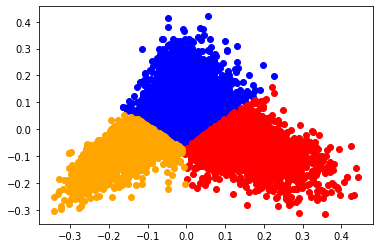

In [307]:
#filter rows of original data
x_pca_label0 = x_pca[label == 0]
x_pca_label1 = x_pca[label == 1]
x_pca_label2 = x_pca[label == 2]
#plotting the results
plt.scatter(x_pca_label0[:,0] , x_pca_label0[:,1], color='blue')
plt.scatter(x_pca_label1[:,0] , x_pca_label1[:,1], color='red')
plt.scatter(x_pca_label2[:,0] , x_pca_label2[:,1], color='orange')
plt.show()

## Modelling

#### Splitting training and test data

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)

(12029, 5120)
(12029,)


### Multinomial Bayes Classifier
The matrix from TF-IDF use as an input into Multinomial Bayes Classifier method. Naive Bayes is a probabilistic approach for constructing data classification model. It is commonly used in Natural Language Processing. Bayes classifier will categorized by calculating probability by using the amount of certain text. Using TF-IDF could improve this model since TF-IDF give more wieght on more frequently used words. 

In [318]:
bayes = MultinomialNB()

In [319]:
bayes.fit(X_train, y_train)

MultinomialNB()

In [320]:
y_pred = bayes.predict(X_test)

In [321]:
y_pred_list = y_pred.tolist()
y_test
df_pred_test = pd.DataFrame({'prediction':y_pred_list, 'test':y_test})
df_pred_test.head(10)

,prediction,test
16441,19,19
6111,2,2
14824,14,14
5349,5,5
4063,19,3
8471,3,11
2778,2,16
1757,13,13
1748,13,13
527,16,9


In [322]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.30      0.45       134
           1       0.54      0.49      0.51       237
           2       0.54      0.81      0.65       286
           3       0.59      0.82      0.69       297
           4       0.82      0.59      0.69       231
           5       0.45      0.59      0.51       299
           6       0.65      0.75      0.70       298
           7       0.74      0.85      0.79       311
           8       0.82      0.34      0.48       195
           9       0.75      0.60      0.67       336
          10       0.97      0.48      0.64       152
          11       0.91      0.64      0.75       314
          12       0.85      0.80      0.82       243
          13       0.79      0.84      0.81       289
          14       0.81      0.85      0.83       238
          15       0.96      0.18      0.30       154
          16       0.38      0.61      0.47       282
          17       0.58    

### Random Forest
Random forest is a method of producing a single result from multiple trees. The output of random forest is the class selected by most trees

In [330]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [331]:
y_pred_clf = clf.predict(X_test)

In [332]:
y_pred_clf_list = y_pred_clf.tolist()
df_pred_test = pd.DataFrame({'prediction':y_pred_clf_list, 'test':y_test})
df_pred_test.head(10)

,prediction,test
16441,19,19
6111,2,2
14824,14,14
5349,5,5
4063,19,3
8471,3,11
2778,2,16
1757,17,13
1748,13,13
527,8,9


In [333]:
clf.score(X_test,y_test)

0.6508921644685803

In [103]:
ing_list['french']

['all-purpose flour',
 'olive oil',
 'butter',
 'large eggs',
 'ground black pepper']

In [96]:
# ingredients_list = ['brazil','british','cajun','chinese','filipino','french','greek','irish','italian','jamaican','japanese','korean','mexican','moroccan','russian','southern_us','spanish','thai','vietnamese']

# with open('tableau_ingredients.csv', 'w') as csvfile:
#     writer = csv.DictWriter(csvfile,fieldnames=ingredients_list)
#     writer.writeheader()
#     writer.writerows(ing_list)
ing_list.keys()

dict_keys(['brazil', 'british', 'cajun', 'chinese', 'filipino', 'french', 'greek', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai', 'vietnamese'])